# Introduction

Welcome to the Scientific Python tutorial! The goal is to present to you the set of simple tools that might be of use in research or education. This tutorial is not meant to be a comprehensive introduction to the language or the plethora of scientific libraries. The only goal is to show that Python is useful and easy to learn. In place of usual passage from basics to advanced features of the language, we are going to use a problem-based approach. By that, I mean that first, we formulate a (scientific) problem and then try to solve it using Python. Appropriate syntax, tricks, and libraries appear along the way.

___
___
___

# Shotgun sequencing

*Links:*
  + [wikipedia](https://en.wikipedia.org/wiki/Shotgun_sequencing)
  + [towardsdatascience](https://towardsdatascience.com/dna-sequence-data-analysis-starting-off-in-bioinformatics-3dba4cea04f)

The first problem is a toy version of DNA sequence reconstruction from the set of overlapping chunks. When one tries to extract the sequence, what she gets is the collection of fragments like that

```
AGCTCTTTGA
      TTGACCGTAATGA
               ATGATTACA
                     ACAAAAT
```

The resulting string is

```
AGCTCTTTGACCGTAATGATTACAAAAT
```

To make the problem manageable, we formulate it as follows.

---


**Shotgun sequencing**

Given a set of strings and an estimation of minimum overlap,
one needs to restore a unique sequence that produced the set.

---

The problem is complicated, so we decompose it on the smaller ones.

## Subproblem 1

*Given two strings `s1` and `s2`, find the first position starting from which the end of the string `s1` coincides with the beginning of the string `s2`.*

For example if

```
s1 = 'GCTATATAC'
s2 = 'TATACGTCTG'
```

it is easy to see that the answer is $4$:

```
012345678
GCTATATAC
    TATACGTCTG
    4
```

To solve this problem, we need a basic python syntax, which we now introduce.

---

## Python: variables (int, double, bool, string), loops (for, while), boolean operations, conditions, list and methods (pop, append, insert, extend)

In [0]:
# # represents a comment
# Shift+Enter executes a cell


# some of build-in types below:
# integer
# double
# complex (1j means imaginary unit)
# string
# string
# bool
# bool

a = 4
b = 6.6
c = 12 + 1j*6
s1 = 'GCTATATAC'
s2 = 'TATACGTCTG'
T = True
F = False

# print 

H = 'Hello!'
print(H)

Hello!


In [0]:
# access a particular element of a string

print(s1[0])
print(s1[1])
print(s1[5])
print(s1[-1]) # counting from the other side 
print(s1[-2])
print(s1[-5])

# access an interval starting from a (included) to b (excluded) s[a:b]
print(s1[0:5])
print(s1[:5])
print(s2[2], s2[2:6], s2[6])

# find a length of the string

print(len(s1), len(s2))

G
C
A
C
A
T
GCTAT
GCTAT
T TACG T
9 10


In [0]:
# for loop
# it is possible to iterate over special variables
# among them is range(start, stop, step)

start = 10
stop = 20
step = 2
for i in range(start, stop, step): # the interval is [start, stop) (right end is excluded)
  print(i)

print('\n') # new line

for i in range(1, 11):
  print(i)

10
12
14
16
18


1
2
3
4
5
6
7
8
9
10


In [0]:
# for loop
# runs over the string too

for s in s1:
  print(s)

print('\n')

for i in range(len(s1)):
  print(s1[i])

G
C
T
A
T
A
T
A
C


G
C
T
A
T
A
T
A
C


Boolean opeartions in Python

|Operation|Python syntax|
|:-------:|:-----------:|
|$\leq$|`<=`|
|$\geq$|`>=`|
|$=$|`==`|
|$\neq$|`!=`|
|conjunction|`and`/`*`|
|disjunction|`or`|

In [0]:
# Boolean opeartions

a = 14
b = -13
c = 22.7
d = 'op'
e = 'oqop'
f = 'oqopop'

print('a < 22?', a < 22)
print('a < 10?', a < 10)
print('a > b?', a > b)
print('a*b + a^2 >= a - b?', a*b + a**2 >= a - b) # a**b means a^b
print('12 < a <= 14?', 12 < a <= 14)
print(d == e)
print(d == e[:2])
print(d == e[2:])
print(f == e + d) # you can add stings

a < 22? True
a < 10? False
a > b? True
a*b + a^2 >= a - b? False
12 < a <= 14? True
False
False
True
True


In [0]:
# conjunction and disjunction

print(1 == 1 and 3>2)
print(1 == 1 and 3<2)
print(1 == 1 or 3<2)

True
False
True


In [0]:
# while loop

a = 14
print(a)

while a<22:
  a += 1
  print(a)

print('\n')

s = 'wo'
target = 'wooooooooooooooooooo'
p = 0

while s != target:
  s += 'o'
  p += 1

print('We are out of the while loop. Total number of iterations is', p)
print('\nVariable s is', s)
print('Is s equals target?', s==target)

14
15
16
17
18
19
20
21
22


We are out of the while loop. Total number of iterations is 18

Variable s is wooooooooooooooooooo
Is s equals target? True


In [0]:
# while loop supports multiple conditions

s = 14
b = -12

print('s', 'b')
while b<s and s<22:
  s += 1
  b += s//3
  print(s, b)

s b
15 -7
16 -2
17 3
18 9
19 15
20 21


In [0]:
# conditions

a = 14
b = 22

if a>b:
  print("a>b")
else:
  print("a<=b")

if a>b:
  print("a>b")
elif a==b:
  print("a=b")
else:
  print("a<b")

# try to run this cell with different a and b

a<=b
a<b


In [0]:
# list is a collection of elements

l1 = [1, 2, 3, 1 + 1j*3, 22==14, 'Hello', ['another list', 12]]
l2 = [2, 2, 2]

# you can

# slice lists and access individual elements (works like with strings)
print(l1[:4])
print(l1[4:])

print('\n')

# add lists
print(l1+l2)

print('\n')

# iterate over lists
for s in l1:
  print(s)

[1, 2, 3, (1+3j)]
[False, 'Hello', ['another list', 12]]


[1, 2, 3, (1+3j), False, 'Hello', ['another list', 12], 2, 2, 2]


1
2
3
(1+3j)
False
Hello
['another list', 12]


In [0]:
# there are useful methods

l1 = [1, 2, 3, 4]
print('Before', l1)

l1.insert(1, [2, 3, 4])
print('After insert', l1)

l1.append(['p', 'q', 12])
print('After append', l1)

l1.extend([23, 32, 13])
print('After extend', l1)

third_element = l1.pop(1)
print('After pop', l1)
print('First element was', third_element)

Before [1, 2, 3, 4]
After insert [1, [2, 3, 4], 2, 3, 4]
After append [1, [2, 3, 4], 2, 3, 4, ['p', 'q', 12]]
After extend [1, [2, 3, 4], 2, 3, 4, ['p', 'q', 12], 23, 32, 13]
After pop [1, 2, 3, 4, ['p', 'q', 12], 23, 32, 13]
First element was [2, 3, 4]


---

## Subproblem 1

Now you are ready to solve the first subproblem. To remind you of the text, I reproduce it below.

*Given two strings `s1` and `s2`, find the first position starting from which the end of the string `s1` coincides with the beginning of the string `s2`.*

For example if

```
s1 = 'GCTATATAC'
s2 = 'TATACGTCTG'
```

it is easy to see that the answer is $4$:

```
012345678
GCTATATAC
    TATACGTCTG
    4
```

For now, we suppose that

+ The answer exists and it is unique
+ The pattern of overlap follows the example above

In [0]:
s1 = 'GCTATATAC'
s2 = 'TATACGTCTG'

overlap = 0

### your solution is here

for i in range(len(s1)):
  substring = s1[i:]
  if substring == s2[:len(substring)]:
    overlap = i

###

print(overlap)

4


Now let us run more tests.

In [0]:
S2 = ['GCTATTCCATC', 'GCTATT', 'GCTATTCCATGTGCGGTT', 'TTTTTGCGC', 'TGCGC']
S1 = [len(s)*'TGC' + s for s in S2] # list comprehension

# thi code is equivalent to the following

S3 = []
for s in S2:
  S3.append(len(s)*'TGC' + s)

print(S1 == S3)

right_answers = [len(s)*3 for s in S2]

True


In [0]:
# occasional python syntax
# zip packs iterables together

s = [1, 2, 3]
name = ['P', 'G', 'D', 'F']

for a, b in zip(s, name):
  print(a, b)

1 P
2 G
3 D


In [0]:
answers = []
for s1, s2 in zip(S1, S2):
  ### your solution is here
  for i in range(len(s1)):
    substring = s1[i:]
    if substring == s2[:len(substring)]:
      overlap = i
  ###
  answers.append(overlap)

print(right_answers == answers)

True


---

## Python: functions

It is inconvenient to copy and past reusable code. Instead, we can pack it in function and call it when we need it.

In [0]:
# simple function

def plus(a, b):
  return a+b

print(plus(2, 3))
print(plus('Zebra', ' strikes back.'))
print(plus([1, 2, 3], [3, 4, 5]))

5
Zebra strikes back.
[1, 2, 3, 3, 4, 5]


In [0]:
# recursion

def factorial(N):
  if N == 1:
    return 1
  else:
    return N*factorial(N-1)

print('120?', factorial(5))
print('720?', factorial(6))

120? 120
720? 720


In [0]:
# optional arguments

def multiply(a, b, c=1, d=1):
  return a*b*c*d**2

print(multiply(2, 3))
print(multiply(2, 3, 4))
print(multiply(2, 3, 4, 2))
print(multiply(2, 3, d=4))

6
24
96
96


---

## Subproblem 1

*Given two strings `s1` and `s2`, find the first position starting from which the end of the string `s1` coincides with the beginning of the string `s2`.*

For example if

```
s1 = 'GCTATATAC'
s2 = 'TATACGTCTG'
```

it is easy to see that the answer is $4$:

```
012345678
GCTATATAC
    TATACGTCTG
    4
```

Pack your code inside the function and run old tests.

In [0]:
### your solution is here

def detect_overlap(s1, s2):
  overlap = 0
  for i in range(len(s1)):
    substring = s1[i:]
    if substring == s2[:len(substring)]:
      overlap = i
  return overlap

###

answers = []
for s1, s2 in zip(S1, S2):
  ### your solution is here
    answers.append(detect_overlap(s1, s2))
  ###

print(right_answers == answers)

True


Now there are two options: either your function passes the following tests or not.

In [0]:
s1 = 'AGCTCTCTCT'
s2 = 'CTCTCTCTAG'
answer = 2

### your solution is here
print(answer == detect_overlap(s1, s2))
###

s1 = 'AGCTGA'
s2 = 'CT'
answer = 2

### your solution is here
print(answer == detect_overlap(s1, s2))
###

False
False


If something is wrong, write a new function!

The new requirement is that we are trying to find **maximal overlap**.

For example,

```
s1 = GCTAGAGAGAGA
s2 = AGAGAGAGAGTT

0123456789
GCTAGAGAGAGA
   AGAGAGAGAGTT
   3
```

and not

```
0123456789
GCTAGAGAGAGA
         AGAGAGAGAGTT
         9
```

In addition make sure that **in case there is no overlap** the function returns $3\big/ 4$.

In case the **second string is inside the first one**, it should work correctly too.

In [0]:
# hint

for i in range(10):
  print(i)
  if i == 8:
    break

0
1
2
3
4
5
6
7
8


In [0]:
### your solution is here

def detect_overlap(s1, s2):
  overlap = 3/4
  for i in range(len(s1)):
    substring = s1[i:]
    if substring[:len(s2)] == s2[:len(substring)]:
      overlap = i
      break
  return overlap

###

s1 = 'AGCTCTCTCT'
s2 = 'CTCTCTCTAG'
answer = 2

### your solution is here
print(answer == detect_overlap(s1, s2))
###

# 3/4 Test

s1 = 'AGCTCTCTCT'
s2 = 'GCTTTTTTTTTT'
answer = 3/4

### your solution is here
print(answer == detect_overlap(s1, s2))
###

# substring test

s1 = 'GTTGACCA'
s2 = 'TGA'
answer = 2

### your solution is here
print(answer == detect_overlap(s1, s2))
###

True
True
True


---

## Subproblem 2

Now when we can detect overlap, I ask you to implement a function with the following behavior.

+ It takes two strings `s1`, `s2` and integer `min_overlap=1`
+ In case there is an overlap `>min_overlap`, it returns `True` and concatenated string.
+ In case there is an overlap, and one string is a substring of another, it returns `True` and the largest string regardless of the size of the overlap compare to `min_overlap`.
+ In case there is no overlap, it returns `False` and `'no overlap'` string.

Remember that previously we cared about the order, i.e., the functions worked like that

```
s1 = 'GTCA'
s2 = 'CA'

detect_overlap(s1, s2) -> 2
detect_overlap(s2, s1) -> 3/4
```

Now we do not care about the order. The function should concatenate strings anyway.

In [0]:
# hint

def divide(a, b):
  return a/b, b/a

print(divide(4, 5))

(0.8, 1.25)


In [0]:
### your solution is here

def merge_me(s1, s2, min_overlap=1):
  N = detect_overlap(s1, s2)
  if N == 3/4:
    return False, s1
  else:
    if len(s2) <= len(s1) - N:
      return True, s1
    elif len(s1) - N < min_overlap:
      return False, s1
    else:
      return True, s1[:N]+s2 

def merge_me_if_you_can(s1, s2, min_overlap=1):
  merged1, target = merge_me(s1, s2, min_overlap=min_overlap)
  merged2 = False
  if not merged1:
    merged2, target = merge_me(s2, s1, min_overlap=min_overlap)
  if merged1 or merged2:
    return merged1 or merged2, target
  else:
    return merged1, 'no overlap'

###

In [0]:
# tests

s1 = 'GTTGACCA'
s2 = 'TGA'

### your solution is here
print(merge_me_if_you_can(s1, s2, min_overlap=100)) # min_overlap = 100
###

print('\n')

s1 = 'GTTGACCA'
s2 = 'ACCAGTTGACC'

### your solution is here
print(merge_me_if_you_can(s1, s2, min_overlap=4)) # min_overlap = 4
print(merge_me_if_you_can(s1, s2, min_overlap=5)) # min_overlap = 5
print(merge_me_if_you_can(s1, s2, min_overlap=8)) # min_overlap = 8
###

print('\n')

s1 = 'GTTGACCA'
s2 = 'CCATTTTTTT'

### your solution is here
print(merge_me_if_you_can(s1, s2, min_overlap=3)) # min_overlap = 3
print(merge_me_if_you_can(s1, s2, min_overlap=4)) # min_overlap = 4
###

(True, 'GTTGACCA')


(True, 'GTTGACCAGTTGACC')
(True, 'ACCAGTTGACCA')
(False, 'no overlap')


(True, 'GTTGACCATTTTTTT')
(False, 'no overlap')


---

Now we are ready to implement the function that glue short chunks of DNA into the larger strand.

## Shotgun sequencing: solution

Suppose the variable `chopped_DNA` contains a set of substrings.

```
chopped_DNA = ['AGCTTCC', 'CCTGA', ...]
```

The strategy is to define a `target` variable and a `mask`. The former contains a concatenated string. The later represents yet unused elements. We move along the `chopped_DNA,` using only elements with the nonzero `mask`, and trying to concatenate the target with each component. In case we succeed, the value of the `mask` becomes `0`, and the `target` becomes the concatenated string. We stop either when the mask consists of zeros or when the number of iteration is too large, in case it is impossible to obtain a single string from available pieces.

In [0]:
def shotgun_DNA(chopped_DNA, rounds=100, min_overlap=1):
  target = chopped_DNA[0]
  mask = [1 for i in range(len(chopped_DNA))]
  mask[0] = 0
  N = 1
  while N<rounds and sum(mask)>0:
    N += 1
    for i in range(len(chopped_DNA)):
      if mask[i] == 1:
        merged, s1 = merge_me_if_you_can(target, chopped_DNA[i], min_overlap=min_overlap)
        if merged:
          target = s1
          mask[i] = 0
  return target

In [0]:
sequence = 'GTCTGACACCCTAGATCGATGTACCAGTGACCACGTATAGACACAGATAGACACACGTATTGGTGTCCCGTGCGT'
chopped_DNA = [sequence[i:j] for i, j in zip([0, 4, 13, 30, 50], [10, 21, 39, 61, 75])]

for i, j in zip([2, 3, 0, 2], [1, 2, 3, 1]):
  dummy = chopped_DNA[i]
  chopped_DNA[i] = chopped_DNA[j]
  chopped_DNA[j] = dummy

for chunk in chopped_DNA:
  print(chunk)

GACACCCTAGATCGATG
CCACGTATAGACACAGATAGACACACGTATT
GATCGATGTACCAGTGACCACGTATA
GTCTGACACC
ACACACGTATTGGTGTCCCGTGCGT


In [0]:
for overlap in range(1, 10):
  reconstructed_straid = shotgun_DNA(chopped_DNA, rounds=100, min_overlap=overlap)
  print('Minimal overlap  =', overlap, 'Reconstructed = Real?', sequence == reconstructed_straid)

Minimal overlap  = 1 Reconstructed = Real? False
Minimal overlap  = 2 Reconstructed = Real? False
Minimal overlap  = 3 Reconstructed = Real? True
Minimal overlap  = 4 Reconstructed = Real? True
Minimal overlap  = 5 Reconstructed = Real? True
Minimal overlap  = 6 Reconstructed = Real? True
Minimal overlap  = 7 Reconstructed = Real? False
Minimal overlap  = 8 Reconstructed = Real? False
Minimal overlap  = 9 Reconstructed = Real? False


---
---
---

# [Ballooning spiders](https://arxiv.org/abs/1309.4731?context=physics)

Please find a link above on the arXiv paper about Grossamer spiders. [It turns out that spiders can fly using electric field of the Earth atmosphere](https://www.theatlantic.com/science/archive/2018/07/the-electric-flight-of-spiders/564437/). What you need howerver is to reproduce the figure (FIG. 2) from [the article](https://arxiv.org/abs/1309.4731?context=physics).

Author estimates the overall charge from the balance of electrastatic and gravitation forces ($H_{eq}$ is an equilibrium height):

\begin{equation}
  Q = \frac{mg}{E_0}e^{\alpha H_{eq}},
\end{equation}

with

\begin{equation}
  \begin{split}
    E_0 &= 120 \frac{V}{m},\\
    \alpha &= 3\times 10^{-4}\frac{1}{m},\\
    g &= 9.8 \frac{m}{s^2}.
  \end{split}
\end{equation}

You goal is to produce comparable figure, i.e. the dependence between equilibrium altitude ($x$) and total charge in nano Coulombs ($y$) for masses $0.1$, $0.3$, $1$, $3$, $10$, $30$, $100$ mg on the same plot. It would be nice to reproduce logarithmic grid too.

---

Hopefully, the goal is clear, but we need to store data, compute exponentials, and produce plots. To achieve that, we now introduce a `numpy`, `matplotlib`, and new Python syntax.

## Python: import, namespaces, IPython magic, numpy and matplotlib, f-strings

Python is popular in part because it comes with an extensive set of libraries for any imaginable problem. To use the library, you need to download it, install and show Python where it stored. Usually, everything works in a more or less automatic fashion. Libraries that we are going to use now are already available, so the only thing we need is to import them.

Below is a simple import statement.

In [0]:
# import library using namespace

import numpy as np

After that, one can call functions from the library using a namespace, as we show in the next line.

In [0]:
# this function create an array (resembles list [a, b, c, d]) of a given size which contains 1

N = 10

a = np.ones(N)
print(a)
print('\n')

# arrays can be of more peculiar shape
M = 3
K = 2

b = np.ones((N, M))
print(b)
print('\n')

c = np.ones((N, M, K))
print(c)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


[[[1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]]]


In [0]:
# shape function allows you to know dimensionality

print(a.shape)

print(b.shape)

print(c.shape)

(10,)
(10, 3)
(10, 3, 2)


There are a lot of functions available for numpy array creation and manipulation. Arguably the best way to learn them is to solve your problems using help from [Google](https://www.google.com/?client=safari), [StackExchange](https://stackexchange.com), and [Documentation](https://numpy.org/doc/1.17/).

In [0]:
# for example there is a function that perform summation along a given axis

a = np.array([
     [[1, 1], [2, 2], [3, 3], [4, 4]],
     [[4, 4], [5, 5], [6, 6], [7, 7]],
     [[7, 7], [8, 8], [9, 9], [10, 10]]
     ])

print(np.sum(a, axis=0), '\n')
print(np.sum(a, axis=1), '\n')
print(np.sum(a, axis=2), '\n')

[[12 12]
 [15 15]
 [18 18]
 [21 21]] 

[[10 10]
 [22 22]
 [34 34]] 

[[ 2  4  6  8]
 [ 8 10 12 14]
 [14 16 18 20]] 



You can add arrays and apply functions from the numpy library to them (in case the sizes are comparable).

In [0]:
# below we create a set of points with uniform distances between them

x = np.linspace(0, 1, 10)
print(x, '\n')

# compute sin and cos
f1 = np.cos(np.pi*x)
print(f1, '\n')
f2 = np.sin(np.pi*x)
print(f2, '\n')

# and check the trigonometric identity
g = f1**2 + f2**2
print(g)

# np.pi is a variables stored in numpy library that contains a value of pi
print(np.pi)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ] 

[ 1.          0.93969262  0.76604444  0.5         0.17364818 -0.17364818
 -0.5        -0.76604444 -0.93969262 -1.        ] 

[0.00000000e+00 3.42020143e-01 6.42787610e-01 8.66025404e-01
 9.84807753e-01 9.84807753e-01 8.66025404e-01 6.42787610e-01
 3.42020143e-01 1.22464680e-16] 

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
3.141592653589793


`Numpy` operates much faster then build-in python function in case an array is large enough. To see that, we create an array and a list and then measure the time of a sum function.

In [0]:
M = int(1e8) # scientific notation for 100000000 produce a float 100000000.0, we convert it to int
a = np.ones(M)
b = [1 for i in range(M)]

In [0]:
%timeit sum(b)

1 loop, best of 3: 692 ms per loop


In [0]:
%timeit np.sum(a)

10 loops, best of 3: 128 ms per loop


Lets also measure the time for the loop.

In [0]:
K = int(1e3)
a = np.ones((K, K))
b = [[1]*K for i in range(K)]

In [0]:
%%timeit

res = 0
for i in range(K):
  for j in range(K):
    res += a[i][j]

1 loop, best of 3: 301 ms per loop


In [0]:
%%timeit

np.sum(a)

The slowest run took 4.66 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 358 µs per loop


As you see, with the growth of dimensionality of the data, the difference between `Numpy` and pure Python becames more and more relevant.

There are other libraries with fast containers:

+ [xarray](http://xarray.pydata.org/en/stable/)
+ [TensorFlow](https://www.tensorflow.org)
+ [Pytorch](https://pytorch.org)
+ [Jax](https://jax.readthedocs.io/en/latest/)
+ [Pandas](https://pandas.pydata.org)

Now we turn to the visualization with matplotlib. [The library](https://matplotlib.org) is vast and complicated, but routine tasks are easy to perform.

In [0]:
# the dot below represents a directory
# so the structure of the package is matplotlib/pyplot.py

import matplotlib.pyplot as plt

# magic command that shows us all plots right here
%matplotlib inline

Now, we are ready to produce the first plot.

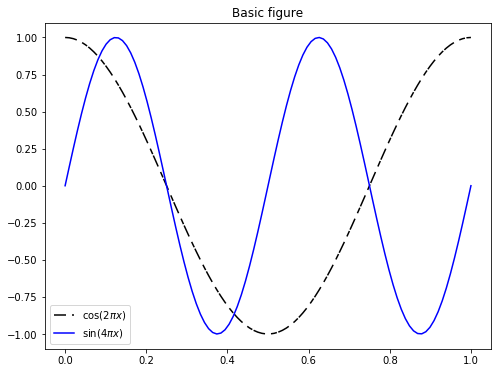

In [0]:
# create relevant objects and fix the size of the figure
fig, ax = plt.subplots(1, 1, figsize = (8, 6))

# create data for the plot
x = np.linspace(0, 1, 100)
f1 = np.cos(2*np.pi*x)
f2 = np.sin(4*np.pi*x)

# draw
ax.plot(x, f1, color='black', dashes=[8, 4, 4, 1], label=r'$\cos(2\pi x)$') # r is for raw
ax.plot(x, f2, color='blue', label= '$\\sin(4\\pi x)$') # without r you should use \\ to represent \
ax.set_title('Basic figure')
ax.legend(loc=3);

Example with more figures stacked together.

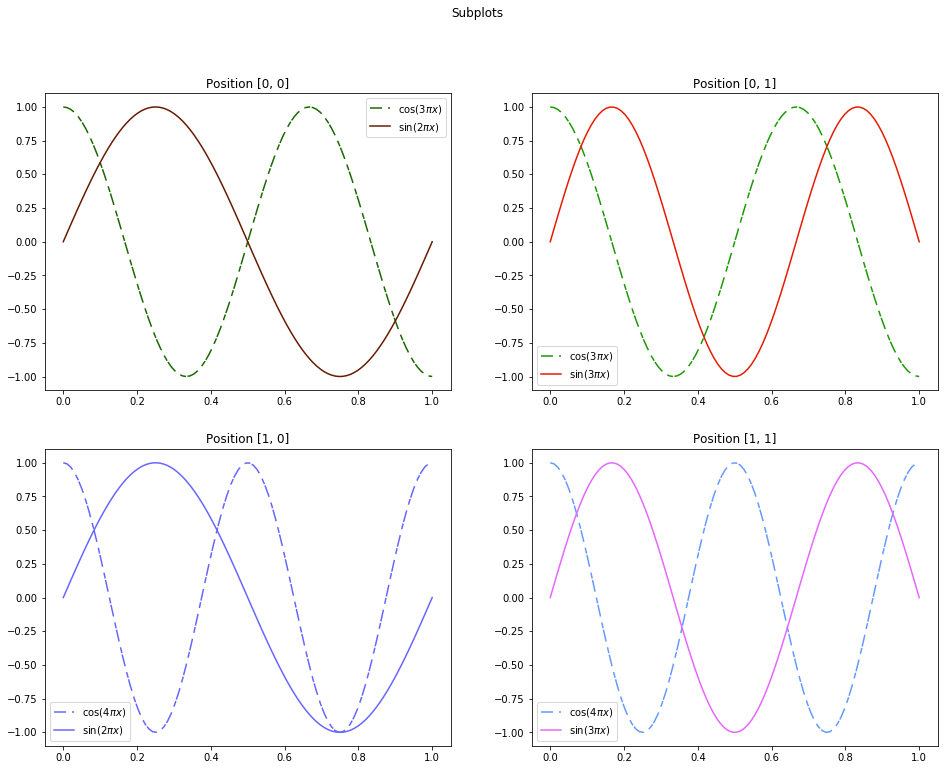

In [0]:
# create four figures
fig, ax = plt.subplots(2, 2, figsize = (16, 12))

fig.suptitle('Subplots')

x = np.linspace(0, 1, 100)
for i in range(2):
  for j in range(2):
    f1 = np.cos((i+3)*np.pi*x)
    f2 = np.sin((j+2)*np.pi*x)

    # f if for format
    ax[i, j].plot(x, f1, color=[i*0.3 + 0.1, j*0.2 + 0.4, i], dashes=[8, 4, 4, 1], label=fr'$\cos({i+3}\pi x)$')
    ax[i, j].plot(x, f2, color=[j*0.5 + 0.4, i*0.3 + 0.1, i], label=fr'$\sin({j+2}\pi x)$')
    ax[i, j].set_title(f'Position [{i}, {j}]')
    ax[i, j].legend()

Some comments about `f-strings`.

In [0]:
# that is the basic syntax

N, M = 3, 4

s1 = f'Mark has {N} apples.\n'
s2 = f'Kate has {M} apples.\n'
s3 = f'Together they have {N+M} apples.'

print(s1 + s2 + s3)

Mark has 3 apples.
Kate has 4 apples.
Together they have 7 apples.


In [0]:
# you can put string in this curly brackets

Name1 = 'Ann'
Name2 = 'John'

s1 = f'{Name1} wakes up early.\n'
s2 = f'{Name2} sleeps all day long.'

print(s1+s2)

Ann wakes up early.
John sleeps all day long.


In [0]:
# or a double

pi = 3.1416926

s = f'Pi up to three significant digits {pi:.3}, and up to six {pi:.6}.'

print(s)

Pi up to three significant digits 3.14, and up to six 3.14169.


There are other libraries for visualization:

+ [seaborn](https://seaborn.pydata.org)
+ [bokeh](https://bokeh.pydata.org/en/latest/index.html)
+ [plotly](https://plot.ly/python/)
+ also you can read this post in [towardsdatascience](https://towardsdatascience.com/interactive-visualizations-in-jupyter-notebook-3be02ab2b8cd) to producce **interactive plots**



---

## Ballooning spiders: solution

The text of the problem for your convenience is below.

Please find a link above on the arXiv paper about Grossamer spiders. [It turns out that spiders can fly using electric field of the Earth atmosphere](https://www.theatlantic.com/science/archive/2018/07/the-electric-flight-of-spiders/564437/). What you need howerver is to reproduce the figure (FIG. 2) from [the article](https://arxiv.org/abs/1309.4731?context=physics).

Author estimates the overall charge from the balance of electrastatic and gravitation forces ($H_{eq}$ is an equilibrium height):

\begin{equation}
  Q = \frac{mg}{E_0}e^{\alpha H_{eq}},
\end{equation}

with

\begin{equation}
  \begin{split}
    E_0 &= 120 \frac{V}{m},\\
    \alpha &= 3\times 10^{-4}\frac{1}{m},\\
    g &= 9.8 \frac{m}{s^2}.
  \end{split}
\end{equation}

You goal is to produce comparable figure, i.e. the dependence between equilibrium altitude ($x$) and total charge in nano Coulombs ($y$) for masses $0.1$, $0.3$, $1$, $3$, $10$, $30$, $100$ mg on the same plot. It would be nice to reproduce logarithmic grid too.

Relevant links

+ [logspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html)

+ [logscale](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html)

+ [grid](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.grid.html)

+ [text](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)

+ [axes properties](https://matplotlib.org/3.1.1/api/axes_api.html)

For a start, you may want to produce a single curve for the mass $0.1\text{ mg}$ on the log-log plot,

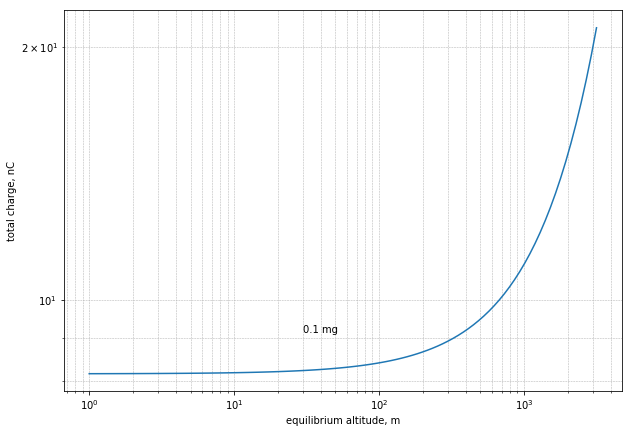

In [0]:
### your solution is here

H = np.logspace(0, 3.5, 100)
m = 0.1
g = 9.8
E = 120
alpha = 3*1e-4

q =  1e3*0.1*g*np.exp(alpha*H)/E

plt.figure(figsize=(10, 7))

plt.plot(H, q, label=f'm = {m}mg')
plt.xscale('log')
plt.yscale('log')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.xlabel('equilibrium altitude, m')
plt.ylabel('total charge, nC')
plt.text(10**2*0.3, q[50]*1.1, f'{m} mg');

###

and then implement a general solution.

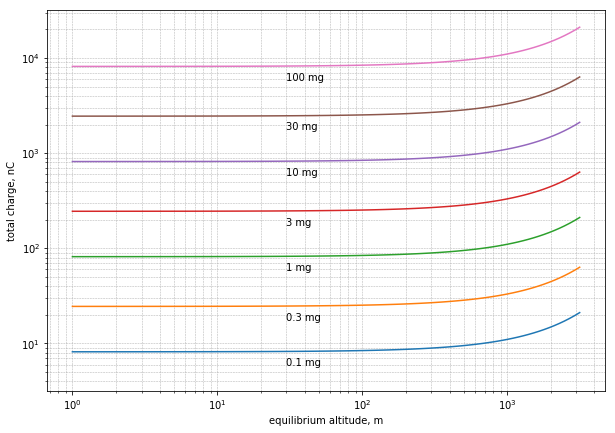

In [0]:
### your solution is here

H = np.logspace(0, 3.5, 100)
M = [0.1, 0.3, 1, 3, 10, 30, 100]
g = 9.8
E = 120
alpha = 3*1e-4
Q = []
for m in M:
  x =  1e3*m*g*np.exp(alpha*H)/E
  Q.append(x)

plt.figure(figsize=(10, 7))

for q, m in zip(Q, M):
  plt.plot(H, q, label=f'm = {m}mg')
  plt.xscale('log')
  plt.yscale('log')
  plt.grid(which='both', linestyle='--', linewidth=0.5)
  plt.xlabel('equilibrium altitude, m')
  plt.ylabel('total charge, nC')
  plt.ylim(bottom=10**0.5, top=10**(4.5))
  plt.text(10**2*0.3, q[50]*0.7, f'{m} mg')

###

---
---
---

# Chemical bonds

This problem is a simple illustration of the concept of the chemical bond. Schrödinger equation does not contain free parameters, so it defines all chemistry in closed form. Too bad, we can not solve this equation for most physical systems, neither analytically nor numerically.

Here we consider a one-dimensional case of stationary Schrödinger for the toy potential with two minima.

\begin{equation}
  \begin{split}
    &\left(-\frac{d^2}{d\widetilde{x}^2} + \widetilde{V}(\widetilde{x})\right) \psi(\widetilde{x}) = \widetilde{E} \psi(\widetilde{x}),~\left\|\psi\right\|_{2}<\infty;\\
    &\widetilde{V}(\widetilde{x}) = \frac{\alpha l_0^4 \left(\widetilde{x}-a\big/ l_0\right)^2\left(\widetilde{x}+a\big/ l_0\right)^2 - V_0}{E_0},~\widetilde{x} = \frac{x}{l_0},~\widetilde{E}=\frac{E}{E_{0}},~E_0 = \frac{\hbar^2}{2m l_{0}^2}.
  \end{split}
\end{equation}

Alternatively, in the usual fashion, we proclaim that energy is measured in the units of $E_0$, and the length is measured in the units of $l_0$. With that we rewrite

\begin{equation}
  \begin{split}
    &\left(-\frac{d^2}{dx^2} + V(x)\right) \psi(x) = E \psi(x),~\left\|\psi\right\|_{2}<\infty;\\
    &V(x) = \alpha\left(x^2-a^2\right)^2 - V_0.
  \end{split}
\end{equation}

**We want to investigate the dependence of the ground state energy from a distance between potential wells.**

In our setting, potential wells represent the attractive potential of the protons in nuclei. The particle under consideration is an electron that forms (or does not from) a bond.

To solve this problem, we use finite differences approximation for the otherwise intractable differential operator

\begin{equation}
  -\frac{d^2}{dx^2}\psi(x) \sim \frac{2\psi(x_i) - \psi(x_{i+1}) - \psi(x_{i-1})}{\Delta x^2},
\end{equation}

and for potential energy we have

\begin{equation}
  V(x)\psi(x) \sim V(x_i)\psi(x_i).
\end{equation}

With that, we need to solve the usual eigenvalue problem

\begin{equation}
  Ax_i = \lambda_i x_i.
\end{equation}

---

## Subproblem 1

For a start, I ask you to plot the potential for different values of parameters:

+ $a \in \left[0, 6\right]$ four points in linear scale, $\alpha = 0.001$, $V_0 = 40$ 
+ $a = 5$, $\alpha = \left[-6, -4\right]$ four points in $\log$-scale, $V_0 = 40$ 
+ $a = 5$, $\alpha = 0.001$, $V_0 \in \left[35, 45\right]$ four points in linear scale 

Use [this function](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots_adjust.html) if you need to adjust subplots.

To remove unnecessary subplots, consider using `fig.delaxes()`.

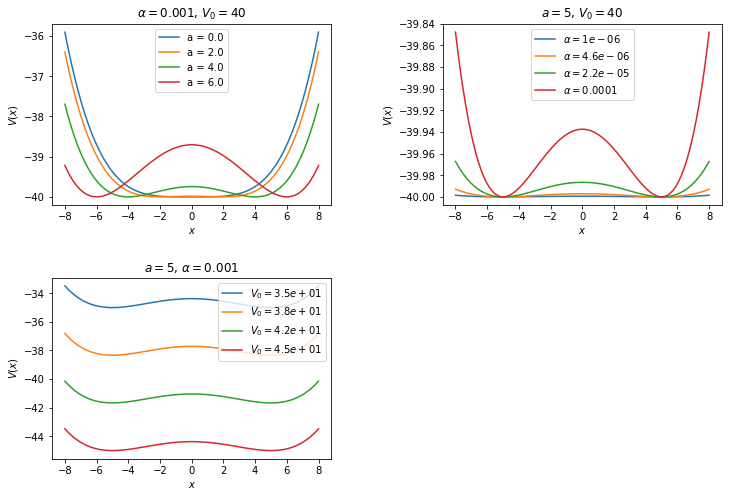

In [0]:
x = np.linspace(-8, 8, 100)

### your solution is here

V = lambda x, a, alpha, V_0: alpha*(x**2 - a**2)**2 - V_0

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
fig.delaxes(ax[1, 1])
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for a in np.linspace(0, 6, 4):
  ax[0, 0].plot(x, V(x, a, 0.001, 40), label=f'a = {a}')
  ax[0, 0].set_title(r'$\alpha = 0.001$, $V_0 = 40$')
  ax[0, 0].set_xlabel('$x$')
  ax[0, 0].set_ylabel('$V(x)$')
  ax[0, 0].legend()

for alpha in np.logspace(-6, -4, 4):
  ax[0, 1].plot(x, V(x, 5, alpha, 40), label=fr'$\alpha = {alpha:.2}$')
  ax[0, 1].set_title(r'$a = 5$, $V_0 = 40$')
  ax[0, 1].set_xlabel('$x$')
  ax[0, 1].set_ylabel('$V(x)$')
  ax[0, 1].legend()

for V_0 in np.linspace(35, 45, 4):
  ax[1, 0].plot(x, V(x, 5, 0.001, V_0), label=fr'$V_0 = {V_0:.2}$')
  ax[1, 0].set_title(r'$a = 5$, $\alpha = 0.001$')
  ax[1, 0].set_xlabel('$x$')
  ax[1, 0].set_ylabel('$V(x)$')
  ax[1, 0].legend()

###

---

## Subproblem 2

Now we want to build a matrix of the linear operator. Write the function that takes the number of points, parameters of the potential, and return the matrix of the linear operator with the vector of coordinates.

Default values of parameters

\begin{equation}
  a = 5,~\alpha = 0.001,~V_0 = 40.
\end{equation}

Minimal and maximal value of $x$ are $\pm8$.

This function can be of interest:

+ [eye](https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html)

In [0]:
def hamiltonian(N, a=5, alpha=1e-3, V_0=40):
  ### your solution is here
  x = np.linspace(-8, 8, N)
  delta_x = x[1] - x[0]

  V = alpha*(x**2-a**2)**2 - V_0
  A = (2*np.eye(N) - np.eye(N, k=-1) - np.eye(N, k=1))/delta_x**2 + np.eye(N)*V
  ###
  return A, x

---

Let's try to find eigenvalues and eigenvectors using standard linear algebra library.

In [0]:
A, x = hamiltonian(1000)
l, vec = np.linalg.eigh(A)

Eigenvalues are in ascending order and aligned with eigenvectors. Below I plot the first two probability densities and all eigenvalues.

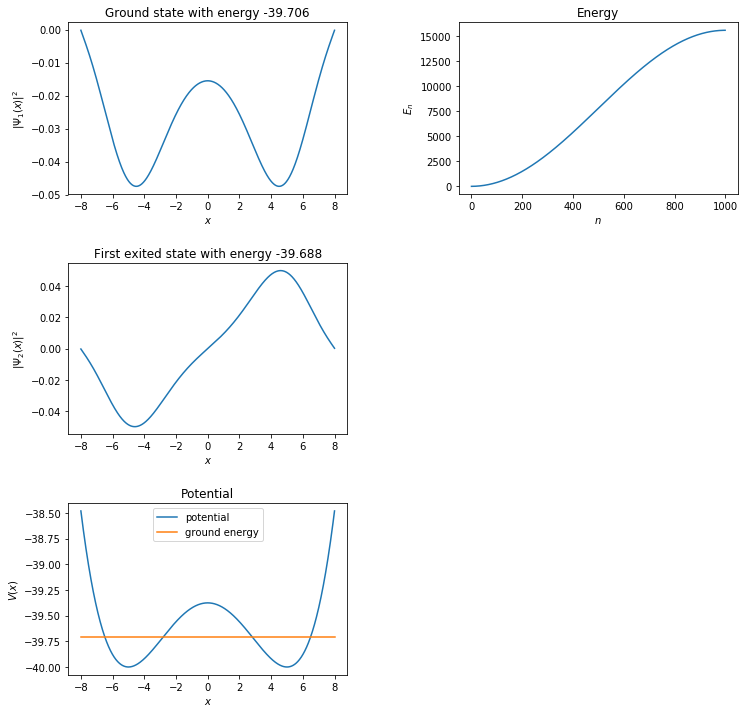

In [0]:
fig, ax = plt.subplots(3, 2, figsize=(12, 12))
fig.delaxes(ax[1, 1])
fig.delaxes(ax[2, 1])
plt.subplots_adjust(wspace=0.4, hspace=0.4)

ax[0, 0].plot(x, vec[:, 0])
ax[0, 0].set_title(f'Ground state with energy {l[0]:.5}')
ax[0, 0].set_xlabel('$x$')
ax[0, 0].set_ylabel('$|\Psi_1(x)|^2$')

ax[0, 1].plot(l)
ax[0, 1].set_title(r'Energy')
ax[0, 1].set_xlabel('$n$')
ax[0, 1].set_ylabel('$E_n$')

ax[1, 0].plot(x, vec[:, 1])
ax[1, 0].set_title(f'First exited state with energy {l[1]:.5}')
ax[1, 0].set_xlabel('$x$')
ax[1, 0].set_ylabel('$|\Psi_2(x)|^2$')

V_0 = 40
a = 5
alpha = 1e-3
V = alpha*(x**2-a**2)**2 - V_0
ax[2, 0].plot(x, V, label='potential')
ax[2, 0].plot(x, V*0 + l[0], label='ground energy')
ax[2, 0].set_title(f'Potential')
ax[2, 0].set_xlabel('$x$')
ax[2, 0].set_ylabel('$V(x)$')
ax[2, 0].legend();

## Chemical bonds: solution

That is the problem:

We want to investigate the dependence of the ground state energy from a distance between potential wells.

+ Scan distances between $0$ and $4$.
+ Use at least $25$ points.
+ Produce a neat figure.

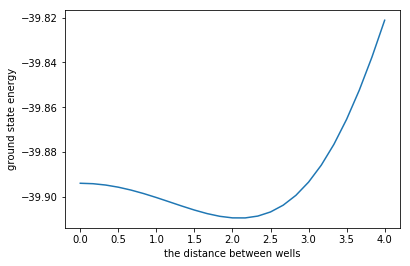

In [0]:
### your solution is here

L = []
distances = np.linspace(0, 4, 25)
for a in distances:
  A, x = hamiltonian(1000, a=a)
  l, vectors = np.linalg.eigh(A)
  L.append(l[0])

plt.plot(distances, L)
plt.xlabel('the distance between wells')
plt.ylabel('ground state energy');

###

---
---
---
# Snowball Earth

In this problem, we investigate the properties of a simple zero-dimensional energy balance model. Sun heats the Earth, and the portion of the energy is reflected due to nonzero albedo $\alpha$. The tricky point is that the albedo itself is a function of temperature (soon, you will see the explicit dependence). Being in thermodynamic equilibrium, Earth radiates according to the Stefan-Boltzmann law.

\begin{equation}
  C\frac{dT}{dt} = (1 - \alpha(T))Q - \epsilon \sigma T^4,
\end{equation}

\begin{equation}
  \epsilon = 0.6,~\sigma = 5.67\times 10^{-8}\frac{W}{m^2 K^4},~Q = 342\frac{W}{m^2},~T\in\left[200K, 350K\right],~C=1 \frac{W}{m^2 K};
\end{equation}

The temperature $T$ that you see above is an average value over the globe and altitude. $C$ just fixes a timescale.

Albedo of the planet is the function of average temperature

\begin{equation}
  \alpha(T) = 0.5 - 0.2\tanh\left(\frac{T - 265}{10}\right).
\end{equation}


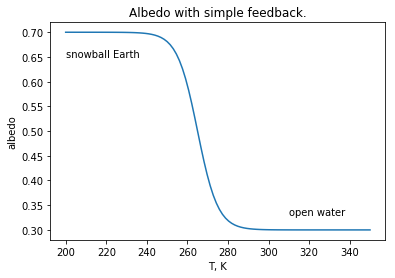

In [0]:
T = np.linspace(200, 350, 100)
alpha = 0.5 - 0.2*np.tanh((T - 265)/10)
plt.plot(T, alpha)
plt.xlabel('T, K')
plt.ylabel('albedo')
plt.text(200, 0.65, 'snowball Earth')
plt.text(310, 0.33, 'open water')
plt.title('Albedo with simple feedback.');

This dependence represents a feedback mechanism: once the temperature falls below zero, the snow and ice reflect more radiation than the open water when everything melts due to the rise of temperature.

Our goasl in this problem are

+ to investigate the dynamics and equilibrium state as well as their dependence on the input parameters
+ to consider the forcing scenario, when the Sun activity changes with time

However, first, we need to discuss some additional syntax.

---

## Python: dictionaries, more advanced functions (unknown number of arguments, keyword arguments, lambda), scipy

There are more build-in types, as you probably suspect. The one that we consider now is a dictionary.

In [0]:
# dictionary has keys and values

apple_pie = {
    'brown sugar': '1/2 cup',
    'flour': {'tablespoon': 3},
    'cinnamon': {'teaspoon': 1},
    'ginger': {'teaspoon': 1/4},
    375: 'bake at for 25 minutes',
    (6, 7): 'cups thinly sliced peeled tart apples'
}

print(apple_pie.keys()) # this is how you can see keys
print(apple_pie.values()) # and this gives you values

dict_keys(['brown sugar', 'flour', 'cinnamon', 'ginger', 375, (6, 7)])
dict_values(['1/2 cup', {'tablespoon': 3}, {'teaspoon': 1}, {'teaspoon': 0.25}, 'bake at for 25 minutes', 'cups thinly sliced peeled tart apples'])


In [0]:
# if you want to add another key and a value

apple_pie['Beat egg white'] = 'until foamy'

print(apple_pie.keys())

dict_keys(['brown sugar', 'flour', 'cinnamon', 'ginger', 375, (6, 7), 'Beat egg white'])


In [0]:
# you can iterate over keys

for key in apple_pie.keys():
  print(key, ':', apple_pie[key])

brown sugar : 1/2 cup
flour : {'tablespoon': 3}
cinnamon : {'teaspoon': 1}
ginger : {'teaspoon': 0.25}
375 : bake at for 25 minutes
(6, 7) : cups thinly sliced peeled tart apples
Beat egg white : until foamy


In [0]:
# there are other methods for dictionaries

item = apple_pie.popitem()
print(item)

for key in apple_pie.keys():
  print(key, ':', apple_pie[key])

# but we are not willing to cover them here
# we will use dictionaries to organize our code better as you will see soon

('Beat egg white', 'until foamy')
brown sugar : 1/2 cup
flour : {'tablespoon': 3}
cinnamon : {'teaspoon': 1}
ginger : {'teaspoon': 0.25}
375 : bake at for 25 minutes
(6, 7) : cups thinly sliced peeled tart apples


We know how to define a function, but what if the number of arguments is unavailable in advanced?

In [0]:
# that will do the job

def multiply(*args):
  output = 1
  for argument in args:
    output *= argument
  return output


print(multiply(1, 2, 3), '\n')

print(multiply(1, 2, 3, 4, 5), '\n')

print(multiply(5), '\n')

6 

120 

5 



The same trick works for keword arguments.

In [0]:
# the main difference is that now we are working with dictionaries

def copycat(*args, **kwargs):
  if len(args) != 0:
    print('Here are values of my arguments')
    for argument in args:
      print(argument)
  if len(kwargs) != 0:
    print('Here you see keword argument')
    for key in kwargs.keys():
      print(key, kwargs[key])

copycat(a=4, b=12, c=32, cat='bark', dog='meow')

print('\n')

copycat(12, 13, 14, [1, 2, 3], 'boom', z22 = 13, pr44 = copycat)

Here you see keword argument
a 4
b 12
c 32
cat bark
dog meow


Here are values of my arguments
12
13
14
[1, 2, 3]
boom
Here you see keword argument
z22 13
pr44 <function copycat at 0x7fcb23f8e7b8>


In [0]:
# you can pass arguments the same way you used them in the definition of the function

copycat(*[4, 12, 32], **{'cat': 'bark', 'dog': 'meow'})

Here are values of my arguments
4
12
32
Here you see keword argument
cat bark
dog meow


Lambda!

In [0]:
# suppose you are so smart that you can write a function in a single line
# the usual def statement looks too clumsy, lambda is more concise

g = lambda a, b: a+b

print(g(2, 3))
print(g(12, 15))

G = lambda **args: [print(k, args[k]) for k in args.keys()][0]

G(copy=14, cat=13)

print('\n')

G(**{'cat': 'bark', 'dog': 'meow'})

5
27
copy 14
cat 13


cat bark
dog meow


In [0]:
# another application is to produce a new function from a previously defined

def greetings(Name, form):
  if form is 'polite':
    print(f'It is a pleasure to have you with us, dear {Name}.\n')
  elif form is 'rude':
    print("Hey, who's let this asshole in?\n")
  else:
    print(f'Hi, {Name}.\n')

greetings('Mike', 'polite')
greetings('Mike', 'rude')
greetings('Mike', 'wahtever')

# now we define a new function that is always polite

polite_greetings = lambda N, f='polite': greetings(N, f)

polite_greetings('Mike')
polite_greetings('Zebra')

It is a pleasure to have you with us, dear Mike.

Hey, who's let this asshole in?

Hi, Mike.

It is a pleasure to have you with us, dear Mike.

It is a pleasure to have you with us, dear Zebra.



[Scipy](https://docs.scipy.org/doc/scipy-1.3.0/reference/) is another extensive library with a lot of useful functionality. We are going to use their implementation of Newton's method.

In [0]:
from scipy.optimize import newton
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

x0 = np.linspace(0, 10, 20)

f = lambda x, a=0.5: a*x - np.cos(2*x)
df = lambda x, a=0.5: a + 2*np.sin(2*x)
d2f = lambda x, a=0.5: 4*np.cos(2*x)

newton?

/usr/local/lib/python3.6/dist-packages/scipy/optimize/zeros.py:461: RuntimeWarning: some failed to converge after 100 iterations
  warnings.warn(msg, RuntimeWarning)


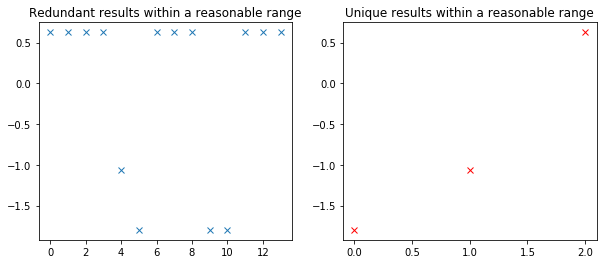

In [0]:
params = {
    'fprime': df,
    'tol': 1e-5,
    'maxiter': 100,
    'fprime2': d2f,
    'rtol': 1e-8
}

result = newton(f, x0, **params)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(result[(result<=2)*(result>=-2)], 'x')
ax[0].set_title('Redundant results within a reasonable range')

ind = np.unique(np.round(result[(result<=2)*(result>=-2)], 4), return_index=True)
ax[1].plot(result[ind[1]], 'x', color='red')
ax[1].set_title('Unique results within a reasonable range');

Another function from Scipy that we are going to use is [odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html).

As an example we solve Van der Pol equation

\begin{equation}
  \begin{split}
    &\dot{x} = y,\\
    &\dot{y} = \mu(1 - x^2)y - x.\\
  \end{split}
\end{equation}

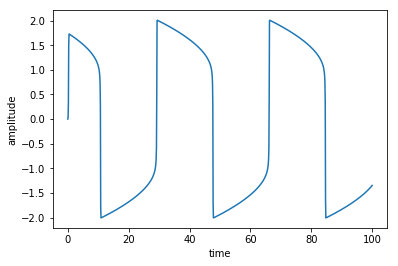

In [0]:
from scipy.integrate import odeint

Van_der_Pol = lambda xy, t, mu: (xy[1], mu*(1 - xy[0]**2)*xy[1] - xy[0])

t = np.linspace(0, 100, 1000)
sol = odeint(Van_der_Pol, [0., 0.1], t, args=(21.43, ))
plt.plot(t, sol[:, 0])
plt.xlabel('time')
plt.ylabel('amplitude');

---

## Subproblem 1

Here are all equations again.

\begin{equation}
  C\frac{dT}{dt} = (1 - \alpha(T))Q - \epsilon \sigma T^4,
\end{equation}

\begin{equation}
  \epsilon = 0.6,~\sigma = 5.67\times 10^{-8}\frac{W}{m^2 K^4},~Q = 342\frac{W}{m^2},~T\in\left[200K, 350K\right],~C=1 \frac{W}{m^2 K};
\end{equation}

The temperature $T$ that you see above is an average value over the globe and altitude. $C$ just fixes a timescale.

Albedo of the planet is the function of average temperature

\begin{equation}
  \alpha(T) = 0.5 - 0.2\tanh\left(\frac{T - 265}{10}\right).
\end{equation}

For a start lets try to solve this equation from different starting points for the standard set of parameters. 

Take the set of initial temperatures to be $T_0 \in \left[200, 350\right]$ with six uniformly distributed points, and find solution $T(t)$ on the time interval $\left[0, 2\right]$.

In [0]:
# Define right hand side with optional parameters (Q, epsilon)

### your solution is here

def g(T, t, Q=342, epsilon=0.6, C=1):
  alpha = 0.5 - 0.2*np.tanh((T - 265)/10)
  sigma = 5.67*1e-8
  return ((1 - alpha)*Q - epsilon*sigma*T**4)/C

###

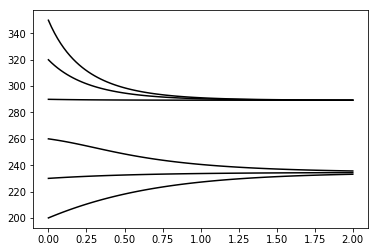

In [0]:
# Solve equation for the starting points specified above and produce a plot with trajectories

### your solution is here

fig, ax = plt.subplots(1, 1)
t = np.linspace(0, 2, 100)
T0 = np.linspace(200, 350, 6)

for t0 in T0:
  sol = odeint(g, t0, t)
  ax.plot(t, sol, color='black')

###

## Subproblem 2

In this problem, I ask you to produce four plots with shared axes. Each plot should contain six trajectories alike ones in the previous problem. Below you can see the values of parameters for each simulation.

||$~~~0~~~$|$~~~1~~~$|
|:---:|:---:|:---:|
|0|$Q = 342\times 1.5$|$\epsilon= 0.7$|
|1|$Q = 342$|$\epsilon = 0.3$|

Parameters that are not specified should be set to default values.

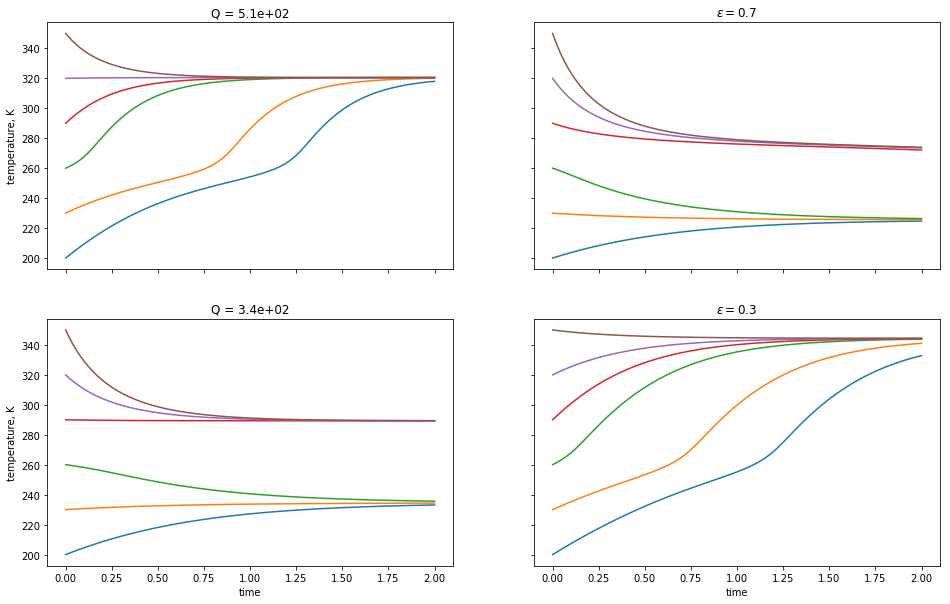

In [0]:
### your solution is here

parameters = {
    'Q': 342,
    'epsilon': 0.6,
    'C': 1
}

fig, ax = plt.subplots(2, 2, figsize=(16, 10), sharex=True, sharey=True)
t = np.linspace(0, 2, 100)
T0 = np.linspace(200, 350, 6)

for i, q in zip(range(2), [342*1.5, 342.0]):
  parameters['Q'] = q
  g_ = lambda T, t: g(T, t, **parameters)
  ax[i, 0].set_title(f'Q = {q:.2}')
  if i==1: ax[i, 0].set_xlabel('time')
  ax[i, 0].set_ylabel('temperature, K')
  for T in T0:
    sol = odeint(g_, T, t)
    ax[i, 0].plot(t, sol)

parameters['Q'] = 342
for i, e in zip(range(2), [0.7, 0.3]):
  parameters['epsilon'] = e
  g_ = lambda T, t: g(T, t, **parameters)
  ax[i, 1].set_title(fr'$\epsilon = {e:.2}$')
  if i==1: ax[i, 1].set_xlabel('time')
  for T in T0:
    sol = odeint(g_, T, t)
    ax[i, 1].plot(t, sol)

###

You can see that the number of steady states depends on the value of parameters. Starting from now, we take $\epsilon$ to be fixed to the default value and vary $Q$.

## Subproblem 3

Now we are ready to produce the first bifurcation diagram. On the $x$-axis, we put the values of $Q$ from $0.5$ to $1.5$ of the default value. On the $y$-axis, we plot all steady states that can be achieved, starting from different initial conditions. To do that, I propose you to use the same starting temperatures as before, integrate till $t=4$, and put all endpoints on the $y$-axis.

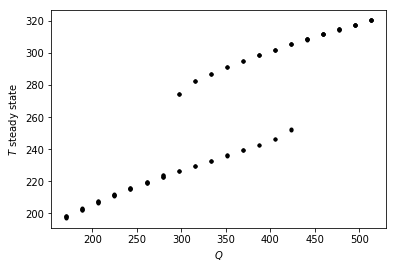

In [0]:
### your solution is here

t = np.linspace(0, 4, 400)
T0 = np.linspace(200, 350, 6)
parameters['epsilon'] = 0.6

for q in np.linspace(342*0.5, 342*1.5, 20):
  for t0 in T0:
    parameters['Q'] = q
    g_ = lambda T, t: g(T, t, **parameters)
    sol = odeint(g_, t0, t)
    plt.plot(q, sol[-1], '.', color='black')
plt.xlabel('$Q$')
plt.ylabel('$T$ steady state');
###

The meaning of this graph will be explained later to the full extent. For now, it is enough to notice that there are values of Q correspond to two steady states and also a single equilibrium.

## Snowball Earth: solution part 1

Here are all equations again.

\begin{equation}
  C\frac{dT}{dt} = (1 - \alpha(T))Q - \epsilon \sigma T^4,
\end{equation}

\begin{equation}
  \epsilon = 0.6,~\sigma = 5.67\times 10^{-8}\frac{W}{m^2 K^4},~Q = 342\frac{W}{m^2},~T\in\left[200K, 350K\right],~C=1 \frac{W}{m^2 K};
\end{equation}


\begin{equation}
  \alpha(T) = 0.5 - 0.2\tanh\left(\frac{T - 265}{10}\right).
\end{equation}

However, the picture that we have is incomplete. That is because we are missing unstable equilibria. To find them, we should compute all roots of the right-hand side for each value of Q. And that is what we are going to do next! More specifically, it would help if you fill the gaps in my code below.


In [0]:
Q = np.linspace(0.6*342, 1.4*342, 20)
T0 = np.linspace(200, 350, 10)

### your solution is here

def RHS(T, Q=342):
  alpha = 0.5 - 0.2*np.tanh((T - 265)/10)
  epsilon = 0.6
  sigma = 5.67*1e-8
  return (1 - alpha)*Q - epsilon*sigma*T**4

def dRHS(T, Q=342):
  epsilon = 0.6
  sigma = 5.67*1e-8
  return 0.02*Q/np.cosh((T - 265)/10)**2 - 4*epsilon*sigma*T**3

def d2RHS(T, Q=342):
  epsilon = 0.6
  sigma = 5.67*1e-8
  return -0.004*Q*np.sinh((T - 265)/10)/np.cosh((T - 265)/10)**3 - 12*epsilon*sigma*T**2

### 

S = []
for q in Q:
  f = lambda T, Q=q: RHS(T, Q)
  df = lambda T, Q=q: dRHS(T, Q)
  d2f = lambda T, Q=q: d2RHS(T, Q)
  solution = newton(f, T0, fprime=df, fprime2=d2f, maxiter=100)
  s = np.unique(np.round(solution, 2))
  s = s[s>0]
  S.append(s)

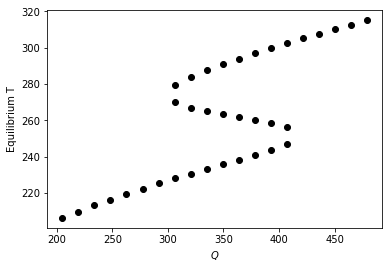

In [0]:
### plot bifurcation diagram
for s, q in zip(S, Q):
  for root in s:
    plt.plot(q, root, 'o', color='black')
plt.xlabel('$Q$')
plt.ylabel('Equilibrium T');

###

## Snowball Earth: solution part 2 (forcing)

Suppose the energy flux from the Sun starts to change gradually. We model this situation by the time-dependent term
\begin{equation}
  Q(t) = Q_0\left(\left[1 - \frac{\gamma}{2}\right] + \frac{\gamma}{1 + e^{-\beta t}}\right).
\end{equation}

There are two parameters $\beta>0$ and $\gamma\in \mathbb{R}$. For large $t$, $Q(t)$ reaches $\sim Q_0\left(1 + \frac{\gamma}{2}\right)$.

There are two parameters $\beta>0$ and $\gamma\in \mathbb{R}$. For large $t$, $Q(t)$ reaches $\sim Q_0\left(1 + \frac{\gamma}{2}\right)$. The first parameter $\beta$ defines the speed of change.

I ask you to obtain a trajectory for the following set of parameters and initial conditions:

+ $T_0 = 200~\text{K}$
+ $\gamma = 1$
+ $\beta = 1\big/10$
+ $Q_0, \epsilon$ default values
+ $t_0 = 0$, $t_1 = 20$

When you get the trajectory, produce three graphs

+ The trajectory itself
+ Below the previous one $Q(t)$
+ To the right from the first one put the bifurcation diagram

In [0]:
# define new right-hand side
### your solution is here

def g(T, t, beta, gamma):
  alpha = 0.5 - 0.2*np.tanh((T - 265)/10)
  Q = 342*((1 - gamma/2) + gamma/(1 + np.exp(-beta*t)))
  epsilon = 0.6
  sigma = 5.67*1e-8
  return (1 - alpha)*Q - epsilon*sigma*T**4

###

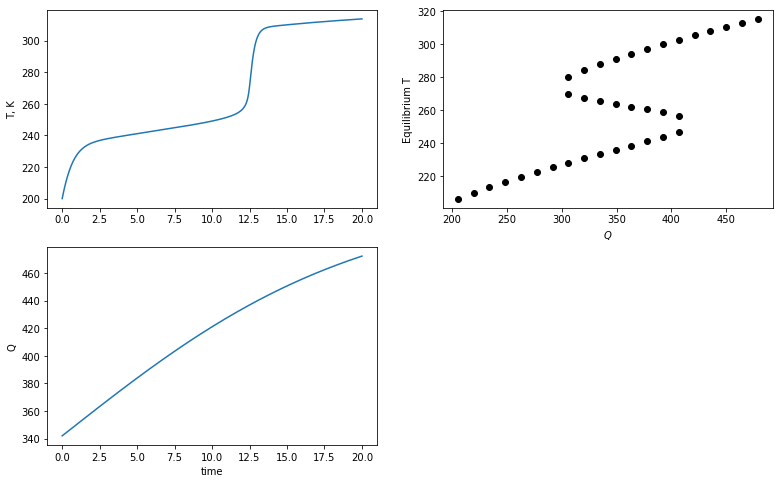

In [0]:
### your solution is here

t = np.linspace(0, 20, 1000)
T0 = 200

fig, ax = plt.subplots(2, 2, figsize=(13, 8))
T_t = odeint(g, T0, t, args=(1/10, 1)).reshape(-1,)
fig.delaxes(ax[1, 1])
ax[0, 0].plot(t, T_t)
ax[0, 0].set_ylabel('T, K')

Q_ = lambda t, beta=1/10, gamma=1: 342*((1 - gamma/2) + gamma/(1 + np.exp(-beta*t)))
ax[1, 0].plot(t, Q_(t))
ax[1, 0].set_ylabel('Q')
ax[1, 0].set_xlabel('t')

for s, q in zip(S, Q):
  for root in s:
    ax[0, 1].plot(q, root, 'o', color='black')
ax[0, 1].set_xlabel('$Q$')
ax[0, 1].set_ylabel('Equilibrium T')

ax[1, 0].set_xlabel('time');

###

This illustrates how forcing can change result in abrupt changes in the behavior when the previous equilibrium point ceases to exist. 

Did we have this scenario in our past? [Yep](https://en.wikipedia.org/wiki/Snowball_Earth).

---
---
---
# Newton's fractals

Newton algorithm and ones alike seek the solutions of the nonlinear equation

\begin{equation}
  g(x) = 0.
\end{equation}

That how Newton's algorithm works: from the initial approximation $x_0$, we construct a better approximation via the solution of a linear model

\begin{equation}
  0 = g(x_0) + \left(x_{\text{new}} - x_0\right)\left.\frac{d g (x)}{d x}\right|_{x=x_0} \Longrightarrow x_{\text{new}} = x_{0}  - g(x_0)\big/\left.\frac{d g (x)}{d x}\right|_{x=x_0}.
\end{equation}

Newton's method is from the class of iterative algorithms, so once you run it from some starting point $x_0$, it produces a series of points:

\begin{equation}
  x_0 \longrightarrow x_1 \longrightarrow \dots\longrightarrow x_n\longrightarrow \dots\longrightarrow x_{\infty}.
\end{equation}

The limit of this sequence (if any) depends on the initial point.

For a given root $x^{\star}$, we define a **basin of attraction** as a set of all starting points, which lead to this root as a limit of Newton's algorithm.

---

Our goal is to study the basins of attraction for different functions. To do that, we are going to run Newton's algorithm on multiply starting points and color them according to their basins of attraction.

---

## Subproblem 1

Write a function that **takes**

1. a function
2. it's derivative (which is another function)
3. $x_0$ - initial guess
4. $N_{\max}$ - maximal number of iterations
5. `tolerance` (optional)
6. `verbose` (optional)

`tolerance` should be used as a stopping criterion and if `verbose == True` printout should contain progress.

and **returns**: approximate solution for $f(x)=0$.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def Newton(f, df, x0, tolerance=1e-10, verbose=False, N_max=100):
  ### your solution is here
  error = 100
  i = 0
  while error>tolerance and i<N_max:
    x0 -= f(x0)/df(x0)
    error = abs(f(x0))
    i+=1
    if verbose:
      print(f'Iteration {i}, error = {error:.2}, x = {x0:.8}.')
  return x0
  ###

Test your function on a simple problems

+ $(x-5)(x+5) = 0$
+ $\cos(x) - x = 0$
+ $x^2 - 1 = 0$

In [0]:
### you solution is here

f = lambda x: (x-5)*(x+5)
df = lambda x: 2*x

Newton(f, df, -6, tolerance=1e-10, verbose=True)
print('\n')
Newton(f, df, +7, tolerance=1e-10, verbose=True)
print('\n')

f = lambda x: np.cos(x) - x
df = lambda x: -np.sin(x) - 1

Newton(f, df, 2, tolerance=1e-10, verbose=True)
print('\n')

f = lambda x: x**2 - 1
df = lambda x: 2*x


Newton(f, df, +2, tolerance=1e-10, verbose=True)
print('\n')
Newton(f, df, -2, tolerance=1e-10, verbose=True);

###

Iteration 1, error = 0.84, x = -5.0833333.
Iteration 2, error = 0.0068, x = -5.0006831.
Iteration 3, error = 4.7e-07, x = -5.0.
Iteration 4, error = 0.0, x = -5.0.


Iteration 1, error = 2.9, x = 5.2857143.
Iteration 2, error = 0.077, x = 5.007722.
Iteration 3, error = 6e-05, x = 5.000006.
Iteration 4, error = 3.5e-11, x = 5.0.


Iteration 1, error = 0.0076, x = 0.73453617.
Iteration 2, error = 7.7e-06, x = 0.73908972.
Iteration 3, error = 7.8e-12, x = 0.73908513.


Iteration 1, error = 0.56, x = 1.25.
Iteration 2, error = 0.051, x = 1.025.
Iteration 3, error = 0.00061, x = 1.0003049.
Iteration 4, error = 9.3e-08, x = 1.0.
Iteration 5, error = 2.2e-15, x = 1.0.


Iteration 1, error = 0.56, x = -1.25.
Iteration 2, error = 0.051, x = -1.025.
Iteration 3, error = 0.00061, x = -1.0003049.
Iteration 4, error = 9.3e-08, x = -1.0.
Iteration 5, error = 2.2e-15, x = -1.0.


## Newton's fractals: solution

Now you are ready to run Newton's algorithm on multiply starting points and color them according to their basins of attraction.

The function of the complex variable is 

\begin{equation}
  g(z) = z^3 - 1.
\end{equation}

Take at least $1000$ points (use fewer number of points during tests!) along each direction.

To show the plot consider to use [imshow](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html). (see example below)

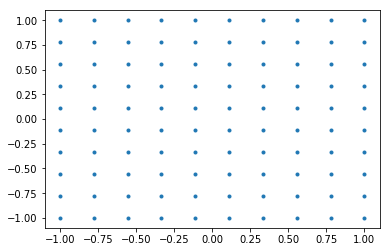

In [0]:
# this is how you can produce points on the grid

N = 10
t = np.linspace(-1, 1, N)
x, y = np.meshgrid(t, t)
x = x.reshape(-1,)
y = y.reshape(-1,)
z = x + 1j*y

plt.plot(np.real(z), np.imag(z), '.');

[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111]


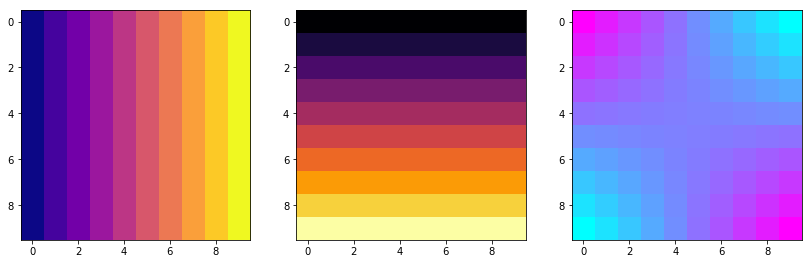

In [0]:
# and here is an example of coloring

c1 = x
c2 = y
c3 = x*y
print(c1[:6]) # that is a bunch of real numbers

fig, ax = plt.subplots(1, 3, figsize=(14, 6))
ax[0].imshow(c1.reshape((N, N)), cmap='plasma')
ax[1].imshow(c2.reshape((N, N)), cmap='inferno')
ax[2].imshow(c3.reshape((N, N)), cmap='cool');

[more colormaps for you](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

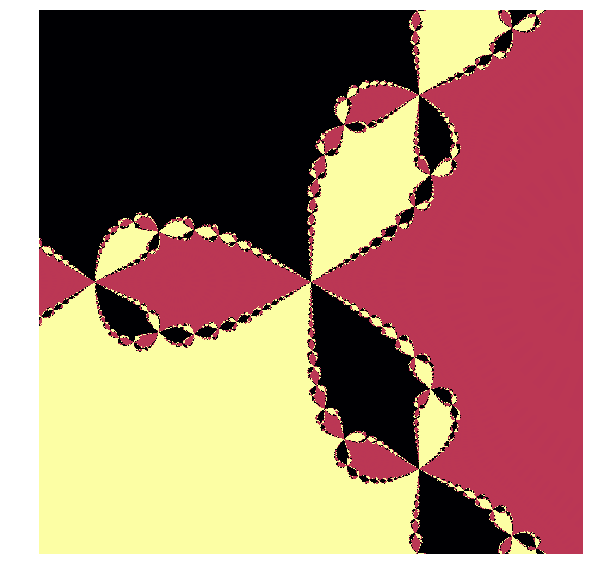

In [0]:
### your solution is here

f = lambda z: z**3 -1
df = lambda z: 3*z**2

N = 1000
t = np.linspace(-1, 1, N)
x, y = np.meshgrid(t, t)
x = x.reshape(-1,)
y = y.reshape(-1,)
z = x + 1j*y

points = []
for p in z:
  solution = Newton(f, df, p)
  points.append(solution)
points = np.hstack(points).reshape(N, N)
points = np.real(np.cos(points)*np.sin(np.imag(points)))

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(points, cmap='inferno')
ax.axis('off');

###